In [1]:
#Importing libraries and dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df_train= pd.read_excel('Data_Train.xlsx')
df_test= pd.read_excel('Data_Test.xlsx')

In [3]:
print(df_train.info())

print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
TITLE            12690 non-null object
RESTAURANT_ID    12690 non-null int64
CUISINES         12690 non-null object
TIME             12690 non-null object
CITY             12578 non-null object
LOCALITY         12592 non-null object
RATING           12688 non-null object
VOTES            11486 non-null object
COST             12690 non-null int64
dtypes: int64(2), object(7)
memory usage: 892.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
TITLE            4231 non-null object
RESTAURANT_ID    4231 non-null int64
CUISINES         4231 non-null object
TIME             4231 non-null object
CITY             4196 non-null object
LOCALITY         4201 non-null object
RATING           4229 non-null object
VOTES            3829 non-null object
dtypes: int64(1), object(7)
memory usage: 264.5+ KB
None


In [4]:
df_train.head(10)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550 votes,800
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509 votes,600
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101 votes,300
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219 votes,200


In [5]:
df_train['source'] = 'train'

df_test['source'] = 'test'

In [6]:
df =pd.concat([df_train, df_test],ignore_index=True)

In [7]:
df.tail(10)

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,source
16911,Mumbai,NaN,"North Indian, Mughlai, Chinese",Goregaon East,3.6,3265,9am – 1am (Mon-Sun),CASUAL DINING,441 votes,test
16912,Bangalore,NaN,"North Indian, Chinese, Kebab, Juices",JP Nagar,3.8,6973,"12noon – 4pm, 7pm – 11pm (Mon-Sun)",QUICK BITES,245 votes,test
16913,Mumbai,NaN,"Sindhi, Street Food",Lower Parel,NEW,6887,"11:30am – 4pm, 7pm – 11:30pm (Mon-Sun)",CASUAL DINING,NaN,test
16914,Bangalore,NaN,"Kerala, South Indian",Indiranagar,3.8,331,"12noon – 4pm, 7pm – 10:30pm (Mon-Sat),12noon –...",QUICK BITES,410 votes,test
16915,Mumbai,NaN,"North Indian, Mughlai, Chinese",Grant Road,4.0,1670,"6am – 12:30AM (Mon, Tue, Wed, Thu, Sat, Sun), ...",QUICK BITES,197 votes,test
16916,New Delhi,NaN,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.9,9057,11:30am – 11:30pm (Mon-Sun),CASUAL DINING,287 votes,test
16917,Bangalore,NaN,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.3,1247,11am – 1am (Mon-Sun),None,469 votes,test
16918,Faridabad,NaN,"Continental, North Indian",Sector 86,3.7,8617,9:30am – 10:30pm (Mon-Sun),QUICK BITES,53 votes,test
16919,Kochi,NaN,"Rolls, Beverages",Kochi,-,6485,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,NaN,test
16920,Bandra West,NaN,Mughlai,Perry Cross Road,3.7,2421,5pm – 1am (Mon-Sun),QUICK BITES,63 votes,test


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 10 columns):
CITY             16774 non-null object
COST             12690 non-null float64
CUISINES         16921 non-null object
LOCALITY         16793 non-null object
RATING           16917 non-null object
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            15315 non-null object
source           16921 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [9]:
df= df.drop(['RESTAURANT_ID','TIME'],axis = 1)

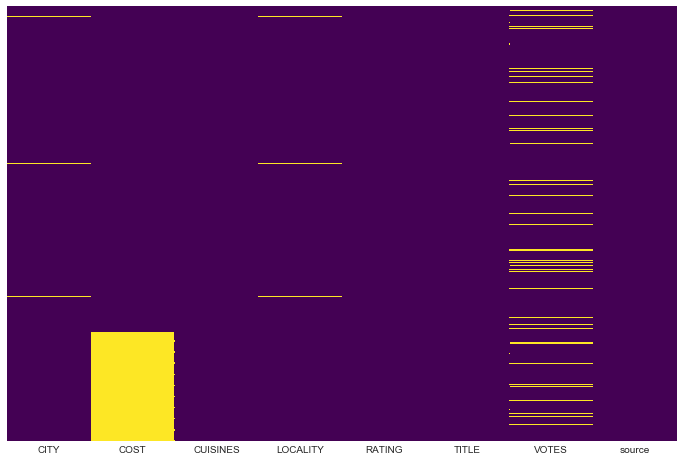

In [10]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(),cmap = 'viridis',yticklabels=False, cbar= False)

city column

In [11]:
len(df['CITY'].unique())

451

In [12]:
df['CITY'] = df['CITY'].fillna('unknown')

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['CITY'] = le.fit_transform(df['CITY'])

cuisines column

In [14]:
len(df['CUISINES'].unique())

5183

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf1 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_cuisines = tf1.fit_transform(df['CUISINES'])
df_cuisines = pd.DataFrame(data=df_cuisines.toarray(), columns=tf1.get_feature_names())

Rating column

In [16]:
df['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [17]:
df['RATING'] = df['RATING'].replace(['NEW','-',np.nan],0)

df['RATING'] = df['RATING'].replace(0,df['RATING'].median())

In [18]:
df['RATING'] = df['RATING'].astype(float)

Title column

In [19]:
df['TITLE'].nunique()

123

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf2 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_title = tf2.fit_transform(df['TITLE'])
df_title = pd.DataFrame(data=df_title.toarray(), columns=tf2.get_feature_names())

votes column

In [21]:
df['VOTES'] = df['VOTES'].astype(str)

In [22]:
df['VOTES'] = df['VOTES'].apply(lambda x: x.replace('votes','').strip())

In [23]:
df['VOTES'] = df['VOTES'].replace("nan",df['VOTES'].median())

In [24]:
df['VOTES'] = df['VOTES'].astype(int)

EDA

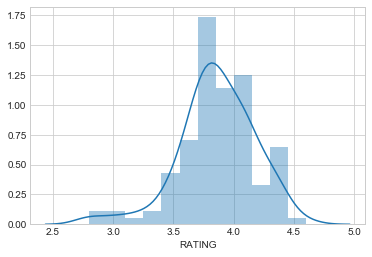

In [25]:
title_mean = df.groupby(['TITLE']).mean().reset_index()

sns.distplot(title_mean['RATING'])

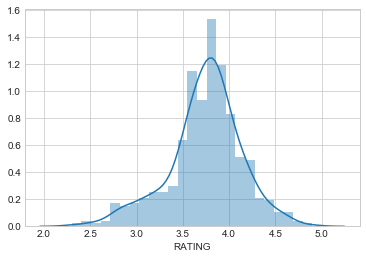

In [26]:
city_mean = df.groupby(['CITY']).mean().reset_index()

sns.distplot(city_mean['RATING'])

Locality Column

In [27]:
df['LOCALITY'].nunique()

1636

In [28]:
df = df.drop(['LOCALITY'], axis = 1)

adding derived columns

In [29]:
df = pd.concat([df, df_title, df_cuisines], axis=1) 

In [30]:
df = df.drop(['TITLE','CUISINES'],axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Columns: 173 entries, CITY to wraps
dtypes: float64(170), int32(2), object(1)
memory usage: 22.2+ MB


In [32]:
df.head()

,CITY,COST,RATING,VOTES,source,bakery,bar,beverage,bhojanalya,bites,...,tamil,tea,tex,thai,tibetan,turkish,varies,vegan,vietnamese,wraps
0,400,1200.0,3.6,49,train,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
1,75,1500.0,4.2,30,train,0.0,0.808335,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
2,75,800.0,3.8,221,train,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
3,277,800.0,4.1,24,train,0.0,0.000000,0.0,0.0,0.707107,...,0.0,0.0,0.0,0.0,0.9538,0.0,0.0,0.0,0.0,0.0
4,277,300.0,3.8,165,train,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0


preparing the data

In [33]:
df_x = pd.DataFrame(df[df['source']== 'train'])

df_x = pd.DataFrame(df_x.drop('source',axis=1))

In [34]:
df_y = df[df['source']== 'test']

df_y = df_.drop('source',axis=1)

In [35]:
X_train = df_x.drop('COST',axis=1) 
Y_train = df_x['COST']
X_test  = df_y.drop('COST',axis=1)

Desicion tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

newdict = dict()
max_features_list = list(range(20,120,10))
max_depth_list = list(range(2,10))

for f in max_features_list:
     for d in  max_depth_list:
            model_dt = DecisionTreeRegressor(max_features=f , max_depth = d)
            kfold = KFold(n_splits = 10)
            results = cross_val_score(model_dt, X_train, Y_train, cv=kfold)
        
            newdict["max_features= {}, max_depth = {}".format(f,d)] = "model_score = {}%".format(results.mean()*100.0)
            

print(max(newdict,key = newdict.get),max(newdict.values()))

max_features= 90, max_depth = 8 model_score = 68.12432663103432%


In [37]:
model_dt = DecisionTreeRegressor(max_features=90 , max_depth = 7)

model_dt.fit(X_train, Y_train)

model_dt.feature_importances_

print (pd.DataFrame(model_dt.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = "Imp",ascending =False))

                    Imp
casual         0.277884
quick          0.179470
RATING         0.162697
dining         0.118663
fine           0.051378
continental    0.046509
lounge         0.040728
finger         0.040524
CITY           0.015555
bar            0.010349
bar            0.008588
VOTES          0.007463
hyderabadi     0.007380
mediterranean  0.005935
south          0.004471
pizza          0.004239
food           0.003180
microbrewery   0.002915
chinese        0.002293
european       0.001919
club           0.001456
indian         0.001203
street         0.001163
north          0.001028
peruvian       0.000950
italian        0.000503
mughlai        0.000491
salad          0.000453
german         0.000408
lebanese       0.000127
...                 ...
greek          0.000000
grill          0.000000
gujarati       0.000000
hawaiian       0.000000
hot            0.000000
coffee         0.000000
dhaba          0.000000
ice            0.000000
dessert        0.000000
indonesian     0

Random forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

newdict2 = dict()
max_depth_list = list(range(4,9))
n_estimators_list = list(range(40,200,40))

for d in max_depth_list:
     for n in  n_estimators_list:
            model_rf = RandomForestRegressor(max_depth=d , n_estimators = n)
            kfold = KFold(n_splits = 10)
            results = cross_val_score(model_rf, X_train, Y_train, cv=kfold)
        
            newdict2["n_estimators= {}, max_depth = {}".format(n,d)] = "model_score = {}%".format(results.mean()*100.0)
            

print(max(newdict2,key = newdict2.get),max(newdict2.values()))

n_estimators= 160, max_depth = 8 model_score = 71.81808639818466%


In [39]:
model_rf = RandomForestRegressor(n_estimators= 160 , max_depth = 8)

model_rf.fit(X_train, Y_train)

model_rf.feature_importances_

print (pd.DataFrame(model_rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = "Imp",ascending =False))

                    Imp
fine           0.453183
casual         0.089468
dining         0.077422
lounge         0.057852
RATING         0.049350
finger         0.038324
bar            0.034623
CITY           0.027859
VOTES          0.024365
continental    0.021402
café           0.013376
club           0.013152
pub            0.012613
sushi          0.009106
chinese        0.007714
hyderabadi     0.007292
mediterranean  0.006702
italian        0.006400
european       0.004855
south          0.004639
indian         0.004308
japanese       0.004278
north          0.004239
food           0.003383
bar            0.002828
mughlai        0.002576
asian          0.002161
korean         0.001687
seafood        0.001629
thai           0.001337
...                 ...
bubble         0.000000
british        0.000000
brazilian      0.000000
bohri          0.000000
bihari         0.000000
armenian       0.000000
assamese       0.000000
australian     0.000000
falafel        0.000000
afghan         0

Ridge Regression

In [40]:
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=.3)
ridge = ridge.fit(X_train,Y_train)

kfold = KFold(n_splits = 10)
results = cross_val_score(model_rf, X_train, Y_train, cv=kfold)

print("model_score: %.3f%%" % (results.mean()*100.0))

model_score: 71.700%


In [41]:
print ("ridge model:", (ridge.coef_))

ridge model: [ 1.15360426e-01  1.08092327e+02  3.15144028e-02 -7.97596405e+01
  5.76319799e+02 -6.10676326e+01  0.00000000e+00 -5.16423793e+01
  4.72156773e+02  3.70637440e+01 -2.78937651e+02  1.46323085e+03
  1.28726614e+03 -2.27885162e+01  8.81305346e+01 -6.20170826e+01
 -9.60520227e+01  6.37070673e+02  2.09459896e+03 -5.68997496e+01
  4.72156773e+02 -1.73330922e+02  8.79327230e+02 -5.95590865e+01
 -8.99490440e+01  5.55069048e+02 -7.97757524e+01 -1.36820175e+02
 -6.20170826e+01  5.99067668e+02 -5.16423793e+01 -1.03665323e+02
  5.86513212e+01 -1.80462656e+02  2.20245165e+00  3.65282591e+01
  1.01066630e+02 -1.49936241e+02  3.94148333e+01 -7.87779702e+01
  6.89687811e+02  2.15088483e+02  1.23175847e+02  5.17593543e+02
  3.65877181e+02 -1.95958876e+01  4.36550357e+02  1.33691988e+02
  6.22274173e+02  2.50728179e+01 -5.11669982e+01 -3.20241845e+01
 -3.86705196e+01 -3.30067175e+01  0.00000000e+00  8.51881870e+01
  8.60241062e+01  4.53028386e+00  1.27263827e+01  9.96289997e+01
 -1.47183626

Lasso Regression

In [42]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.3)
lasso = lasso.fit(X_train,Y_train)

kfold = KFold(n_splits = 10)
results = cross_val_score(lasso, X_train, Y_train, cv=kfold)

print("model_score: %.3f%%" % (results.mean()*100.0))

model_score: 71.405%


In [43]:
print ("lasso model:", (lasso.coef_))

lasso model: [ 1.14903529e-01  1.16474325e+02  3.70141585e-02 -3.18536803e+01
  6.33696312e+02 -0.00000000e+00  0.00000000e+00 -3.54448991e+01
  0.00000000e+00  1.19187763e+02  0.00000000e+00  1.41875061e+03
  7.49081383e+02 -0.00000000e+00  2.01412866e+01 -7.42375549e+01
 -0.00000000e+00  4.35784159e+02  2.24727663e+03  0.00000000e+00
  0.00000000e+00 -6.79272054e+01  9.21634028e+02  0.00000000e+00
 -0.00000000e+00  5.78370906e+02 -2.41199484e+01 -0.00000000e+00
 -0.00000000e+00  6.30766518e+02 -0.00000000e+00 -1.19943032e+02
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  5.32441227e+01 -0.00000000e+00  0.00000000e+00 -8.79156856e+01
  0.00000000e+00  1.94857703e+02  0.00000000e+00  0.00000000e+00
  9.75553028e+00 -4.05828025e+01  2.59807889e+02  5.65788603e+01
  0.00000000e+00  0.00000000e+00 -6.19902221e+01 -0.00000000e+00
 -5.32105420e+01 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.92541570e+01
 -0.00000000

Random forest turned out to be the best regressor

In [44]:
model_rf = RandomForestRegressor(n_estimators= 160 , max_depth = 8)

model_rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=8, n_estimators=160)

In [45]:
predictions = model_rf.predict(X_test)

In [46]:
predictions

array([ 606.67885959, 1525.34375511,  607.6688171 , ..., 1603.81522743,
        590.96495969,  752.14014737])